<a href="https://colab.research.google.com/github/IAlam0819/COVID19-Detection/blob/main/Covid_Xray_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mounting Google Drive locally**
The code shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing keras
import keras

Using TensorFlow backend.


We will have a 'training' directory containing a 'covid' directory and a 'normal' one. 
Let's define their path:

In [ ]:
#path for covid the directory
path_covid = '/content/drive/My Drive/Colab Notebooks/dataset/covid_dataset/covid'
#path for the normal directory
path_normal = '/content/drive/My Drive/Colab Notebooks/dataset/covid_dataset/normal'

Defining the 'covid' and 'normal' directories :

In [ ]:
import os
# Directory with our training covid pictures
covid_dir = os.path.join(path_covid)

# Directory with our training normal pictures
normal_dir = os.path.join(path_normal)

Let's see what the filenames look like in the covid and normal training directories:

In [ ]:
#name of the files
covid_names = os.listdir(covid_dir)
print(covid_names[:10])

normal_names = os.listdir(normal_dir)
print(normal_names[:10])

['auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '1-s2.0-S0929664620300449-gr2_lrg-b.jpg', 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'ryct.2020200034.fig5-day7.jpeg', 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '1-s2.0-S0929664620300449-gr2_lrg-d.jpg', 'ryct.2020200034.fig2.jpeg', 'nejmoa2001191_f5-PA.jpeg', '1-s2.0-S0929664620300449-gr2_lrg-c.jpg', 'ryct.2020200034.fig5-day4.jpeg']
['person339_bacteria_1574.jpeg', 'person1830_bacteria_4693.jpeg', 'person1558_bacteria_4066.jpeg', 'person1290_virus_2215.jpeg', 'person925_virus_1582.jpeg', 'IM-0466-0001.jpeg', 'NORMAL2-IM-0315-0001.jpeg', 'person1935_bacteria_4849.jpeg', 'person378_virus_761.jpeg', 'IM-0033-0001-0001.jpeg']


Total number of covid-case and normal-case images in the directories:


In [ ]:
print('total training covid images:', len(os.listdir(covid_dir)))
print('total training normal images:', len(os.listdir(normal_dir)))

total training covid images: 25
total training normal images: 25


Let's take a look at a few pictures to get a better sense of what they look like. By configuring the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Displaying a batch of 8 covid-case and 8 normal-case pictures.We can rerun the cell to see a fresh batch each time:

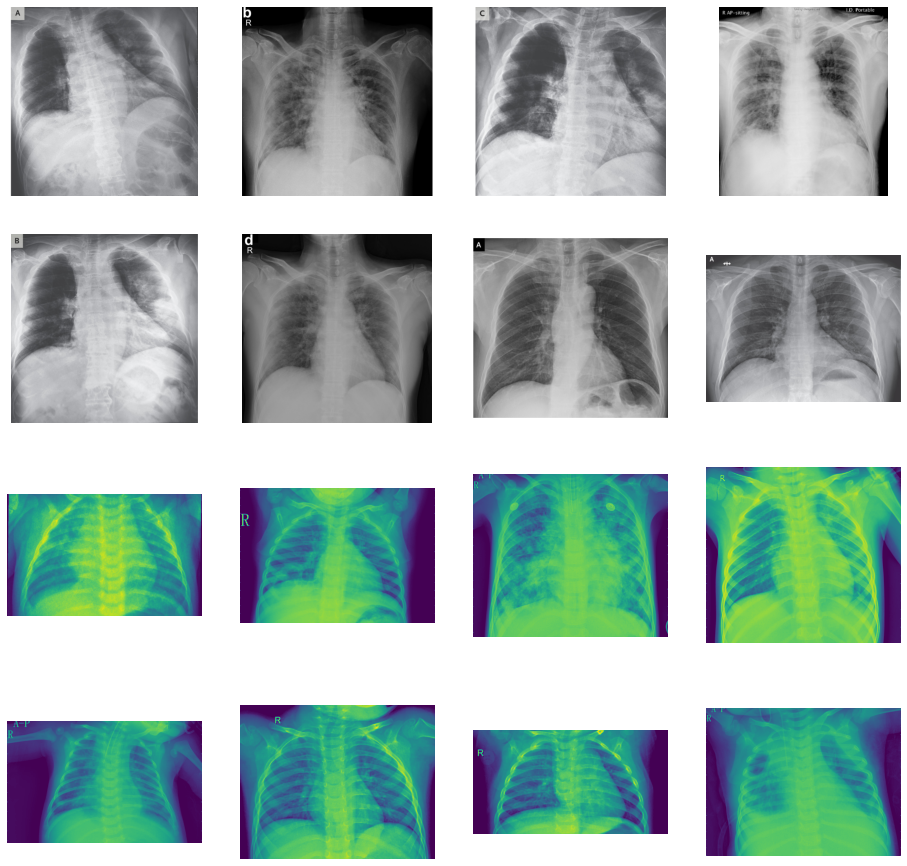

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_covid_pix = [os.path.join(covid_dir, fname) 
                for fname in covid_names[pic_index-8:pic_index]]
next_normal_pix = [os.path.join(normal_dir, fname) 
                for fname in normal_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_covid_pix+next_normal_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Building a CNN Model**

In [ ]:
#importing Tensorflow
import tensorflow as tf

Defining the desired accuracy and adding CallBacks.

In [ ]:
DESIRED_ACCURACY = 0.999

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>DESIRED_ACCURACY):
      print("\n Reached 99.9% accuracy so cancelling training!")
      self.model.stop_training=True

callbacks = myCallback()

We will be **adding convolutional layers** to the model, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers.

As its a **two-class classification** problem, i.e. a binary classification problem, we will end our network with a **sigmoid activation**, so that the **output of our network will be a single scalar between 0 and 1**, encoding the probability that the current image is class 1 (as opposed to class 0).


In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('covid') and 1 for the other ('normal')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the Neural Network.

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

Next, we'll configure the specifications for model training. We will train our model with the **binary_crossentropy loss**, because it's a binary classification problem and our **final activation is a sigmoid**. We will use the **rmsprop optimizer** with a learning rate of 0.001. 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# **Data Preprocessing**

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have a generator for the training images,it will yield batches of images of size 224x224 and their labels (binary).

Data that goes into neural networks should be normalized in some way to make it more amenable to processing by the network. We will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the **keras.preprocessing.image.ImageDataGenerator** class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches. These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/dataset/covid_dataset',  # This is the source directory for training images
        target_size=(224, 224),
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 50 images belonging to 2 classes.


# **Training**

We wil train our model for 5 epochs.


The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses.


In [ ]:
#Training
history = model.fit(
      train_generator,  
      epochs=5,
      verbose=1, callbacks=[callbacks])

Epoch 1/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 0.7413 - accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - ETA: 0s - loss: 0.4693 - accuracy: 1.0000
 Reached 99.9% accuracy so cancelling training!
1/1 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 1.0000


# **Running the Model**

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a covid-case or a normal-case of covid.


In [ ]:
#prediction
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a normal case")
  else:
    print(fn + " is a covid case")
 

Saving NORMAL2-IM-0315-0001.jpeg to NORMAL2-IM-0315-0001.jpeg
[1.]
NORMAL2-IM-0315-0001.jpeg is a normal case


# **Visualizing Intermediate Representations**

This code is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


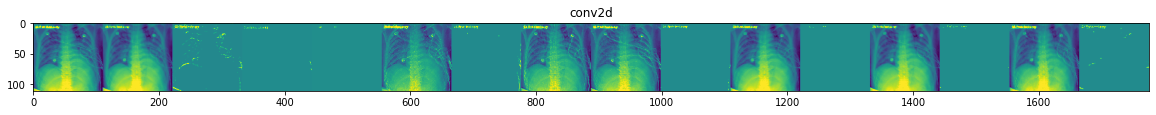

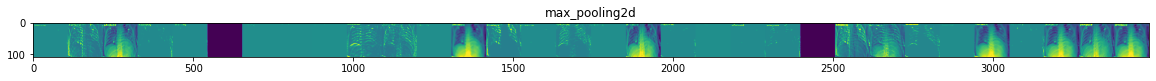

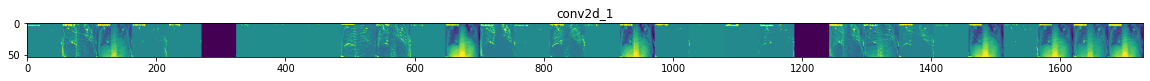

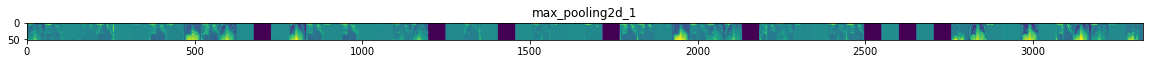

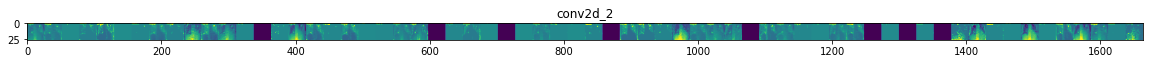

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
covid_files = [os.path.join(covid_dir, f) for f in covid_names]
normal_files = [os.path.join(normal_dir, f) for f in normal_names]
img_path = random.choice(covid_files + normal_files)

img = load_img(img_path, target_size=(224, 224)) 
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')